In [ ]:
!pip install kaggle

In [2]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 97% 25.0M/25.7M [00:00<00:00, 142MB/s] 
100% 25.7M/25.7M [00:00<00:00, 130MB/s]


In [3]:
!unzip imdb-dataset-of-50k-movie-reviews.zip

Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [4]:
%matplotlib inline
%load_ext autoreload

In [ ]:
# !pip install pandas_profiling
# !pip install pydantic==1.8.2

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt

<ipython-input-1-16b007a30890>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [123]:
df = pd.read_csv('/content/IMDB Dataset.csv',nrows=100)
print(df.info())
print(len(df))
print(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     100 non-null    object
 1   sentiment  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB
None
100
                                               review sentiment
38  Okay, so this series kind of takes the route o...  positive
50  Return to the 36th Chamber is one of those cla...  positive
23  First of all, let's get a few things straight ...  negative
68  I'm not sure why the producers needed to trade...  negative
43  I had heard good things about "States of Grace...  negative


In [3]:
# prof = ProfileReport(df,title="IMDB Profiling Report",config_file="")
# prof.to_file(output_file='./datasets/IMDB/IMDB.html')

### Sentiment Label EDA

In [118]:
def plot_sentiment_distribution(df):
    """Plot the distribution of sentiment labels."""
    plt.figure(figsize=(8, 6))
    sns.countplot(x='sentiment', data=df)
    plt.title('Distribution of Sentiment Labels')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

def calculate_sentiment_stats(df):
    """Calculate statistics and proportions for each sentiment category."""
    # Calculate statistics for each sentiment category
    sentiment_stats = df.groupby('sentiment').size().reset_index(name='count')

    # Calculate the total count of samples
    total_count = len(df)
    num_unique_words = len(set(' '.join(df['review']).split()))
    avg_review_length = df['review'].apply(lambda x: len(x.split())).mean()

    # Calculate the proportion of positive and negative sentiments
    positive_count = sentiment_stats[sentiment_stats['sentiment'] == 'positive']['count'].values[0]
    negative_count = sentiment_stats[sentiment_stats['sentiment'] == 'negative']['count'].values[0]
    positive_proportion = positive_count / total_count
    negative_proportion = negative_count / total_count


    # Create a dictionary to store the results
    results = {
        "total_rows":len(df),
        'num_unique_words': num_unique_words,
        'avg_review_length': avg_review_length,
        'sentiment_stats': sentiment_stats,
        'positive_count': positive_count,
        'negative_count': negative_count,
        'positive_proportion': positive_proportion,
        'negative_proportion': negative_proportion
    }

    return results

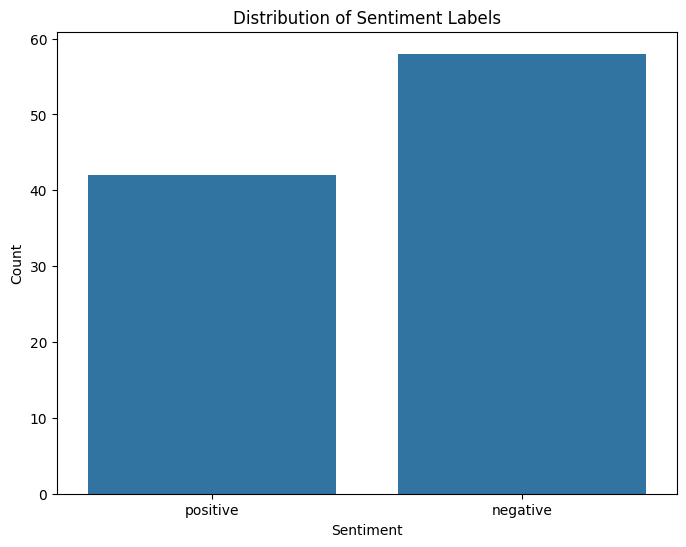

In [105]:
plot_sentiment_distribution(df)

In [107]:
sentiment_stats = calculate_sentiment_stats(df)

In [119]:
sentiment_results = calculate_sentiment_stats(df)
print("\n Total Reviews",sentiment_results["total_rows"])
print("Number of Unique Words:", sentiment_results['num_unique_words'])
print("Average Review Length (in words):", sentiment_results['avg_review_length'])

print("\nSentiment Statistics:")
print(sentiment_results['sentiment_stats'])
print("\nProportion of Positive Sentiment:", sentiment_results['positive_proportion'])
print("Proportion of Negative Sentiment:", sentiment_results['negative_proportion'])


 Total Reviews 100
Number of Unique Words: 6821
Average Review Length (in words): 231.31

Sentiment Statistics:
  sentiment  count
0  negative     58
1  positive     42

Proportion of Positive Sentiment: 0.42
Proportion of Negative Sentiment: 0.58


### Reviews EDA

In [94]:
import nltk
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Word-Frequency Analysis
def word_freq_analysis(tokens):
  fdist= FreqDist(tokens)

  # Generate word clouds
  text = ' '.join(tokens)
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

  return fdist,wordcloud

# TF-IDF Analysis
def tfidf_analysis(corpus, ngram_range=(1, 1)):
    tfidf_vectorizer = TfidfVectorizer(ngram_range=ngram_range)
    tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    return tfidf_matrix, feature_names

# N-gram Analysis
def ngram_analysis(tokens, n=2):
    ngrams_list = list(ngrams(tokens, n))
    freq_dist = FreqDist(ngrams_list)
    return freq_dist

# Lexical Diversity Analysis
def lexical_diversity(tokens):
    return len(set(tokens)) / len(tokens)

In [5]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
positive_corpus=df[df['sentiment'] == 'positive']['review'].str.cat(sep=' ')  # Combined in 1 string
print(positive_corpus[0:10])

negative_corpus=df[df['sentiment'] == 'negative']['review'].str.cat(sep=' ')
print(negative_corpus[0:10])

One of the
Basically 


In [22]:
# Tokenization
postive_tokens = word_tokenize(positive_corpus)
negative_tokens = word_tokenize(negative_corpus)

In [23]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_positive_tokens = [word for word in postive_tokens if word.lower() not in stop_words]
filtered_negative_tokens = [word for word in negative_tokens if word.lower() not in stop_words]


#####Word Frequency

In [ ]:
# Word Frequency Analysis for Positive/Negative Reviews
fdist_positive,positive_wordcloud=word_freq_analysis(filtered_positive_tokens)
fdist_negative,negative_wordcloud=word_freq_analysis(filtered_negative_tokens)

Most common words in positive reviews: [(',', 95), ('.', 55), ('<', 36), ('br', 36), ('/', 36), ('>', 36), ("'s", 19), ('one', 14), ('film', 11), ("'", 10)]
Most common words in negative reviews: [('>', 63), ('.', 63), ('<', 60), ('br', 60), ('/', 60), (',', 52), ("'s", 20), ('film', 18), ('?', 18), ('movie', 16)]


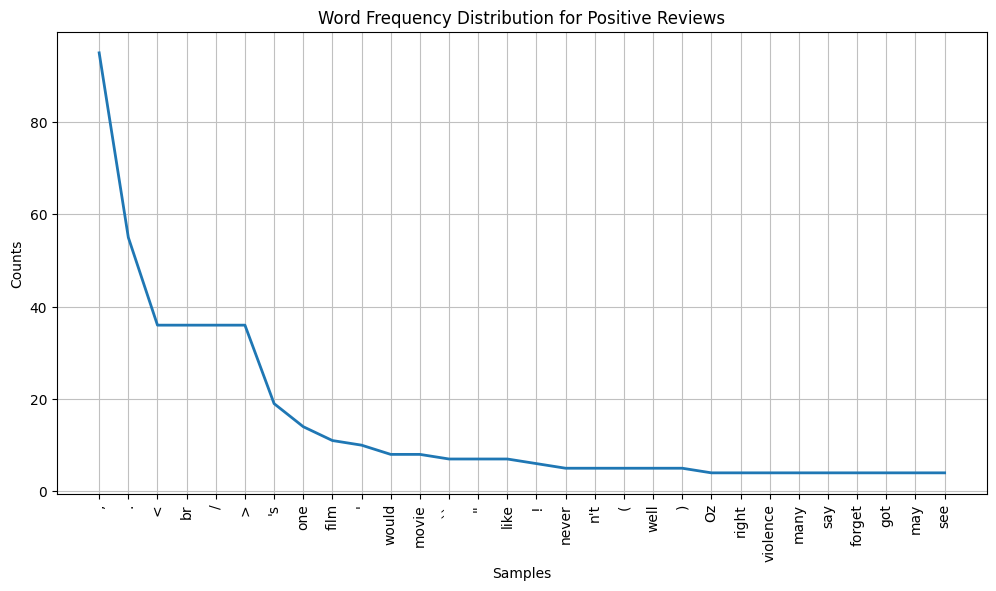

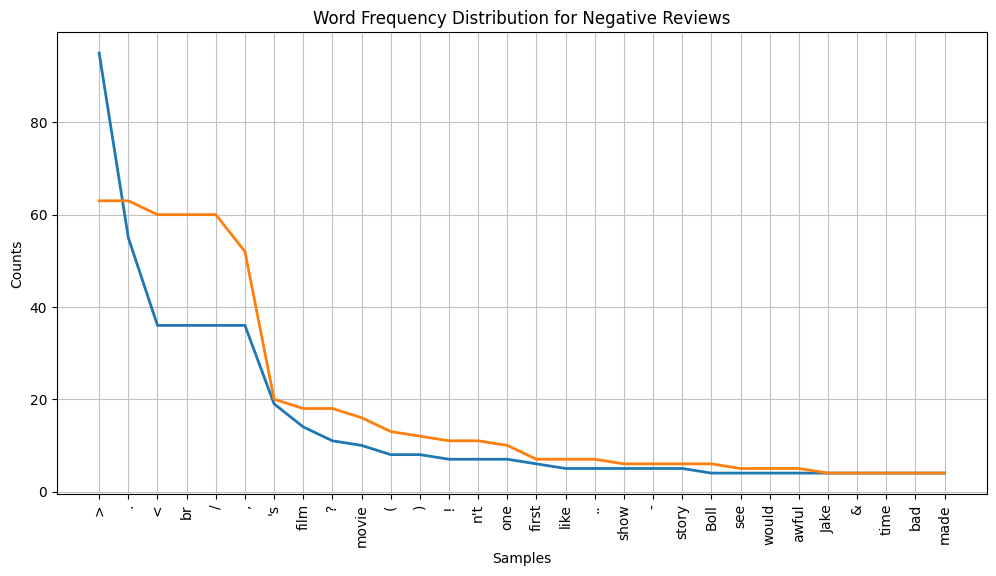

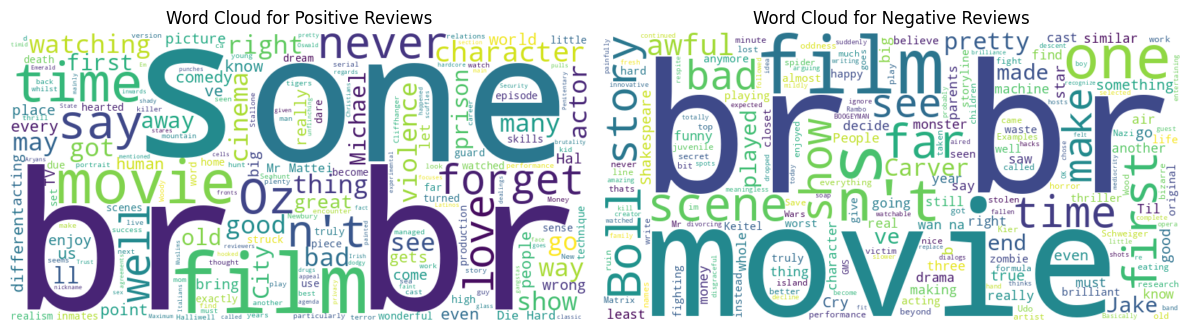

In [62]:
print("Most common words in positive reviews:", fdist_positive.most_common(10))
print("Most common words in negative reviews:", fdist_negative.most_common(10))

# Plot Word Frequency Distributions for Positive and Negative Reviews side by side
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 6))

# Plot Word Frequency Distribution for Positive Reviews
plt.sca(ax1)
plt.title('Word Frequency Distribution for Positive Reviews')
plt.xlabel('Word')
plt.ylabel('Frequency')
fdist_positive.plot(30, cumulative=False)

# Plot Word Frequency Distribution for Negative Reviews
plt.sca(ax1)
plt.title('Word Frequency Distribution for Negative Reviews')
plt.xlabel('Word')
plt.ylabel('Frequency')
fdist_negative.plot(30, cumulative=False)

# Plot word clouds
plt.figure(figsize=(12, 6))

# Plot word cloud for positive reviews
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

# Plot word cloud for negative reviews
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

plt.tight_layout()
plt.show()


#####TF-IDF

In [97]:
# On Original Examples without removing stop words
df_positive_reviews=df[df['sentiment'] == 'positive']['review']
df_negative_reviews=df[df['sentiment'] == 'negative']['review']

# TF-IDF Analysis
tfidf_matrix_positive, feature_names_positive = tfidf_analysis(df_positive_reviews)
tfidf_matrix_negative, feature_names_negative = tfidf_analysis(df_negative_reviews)

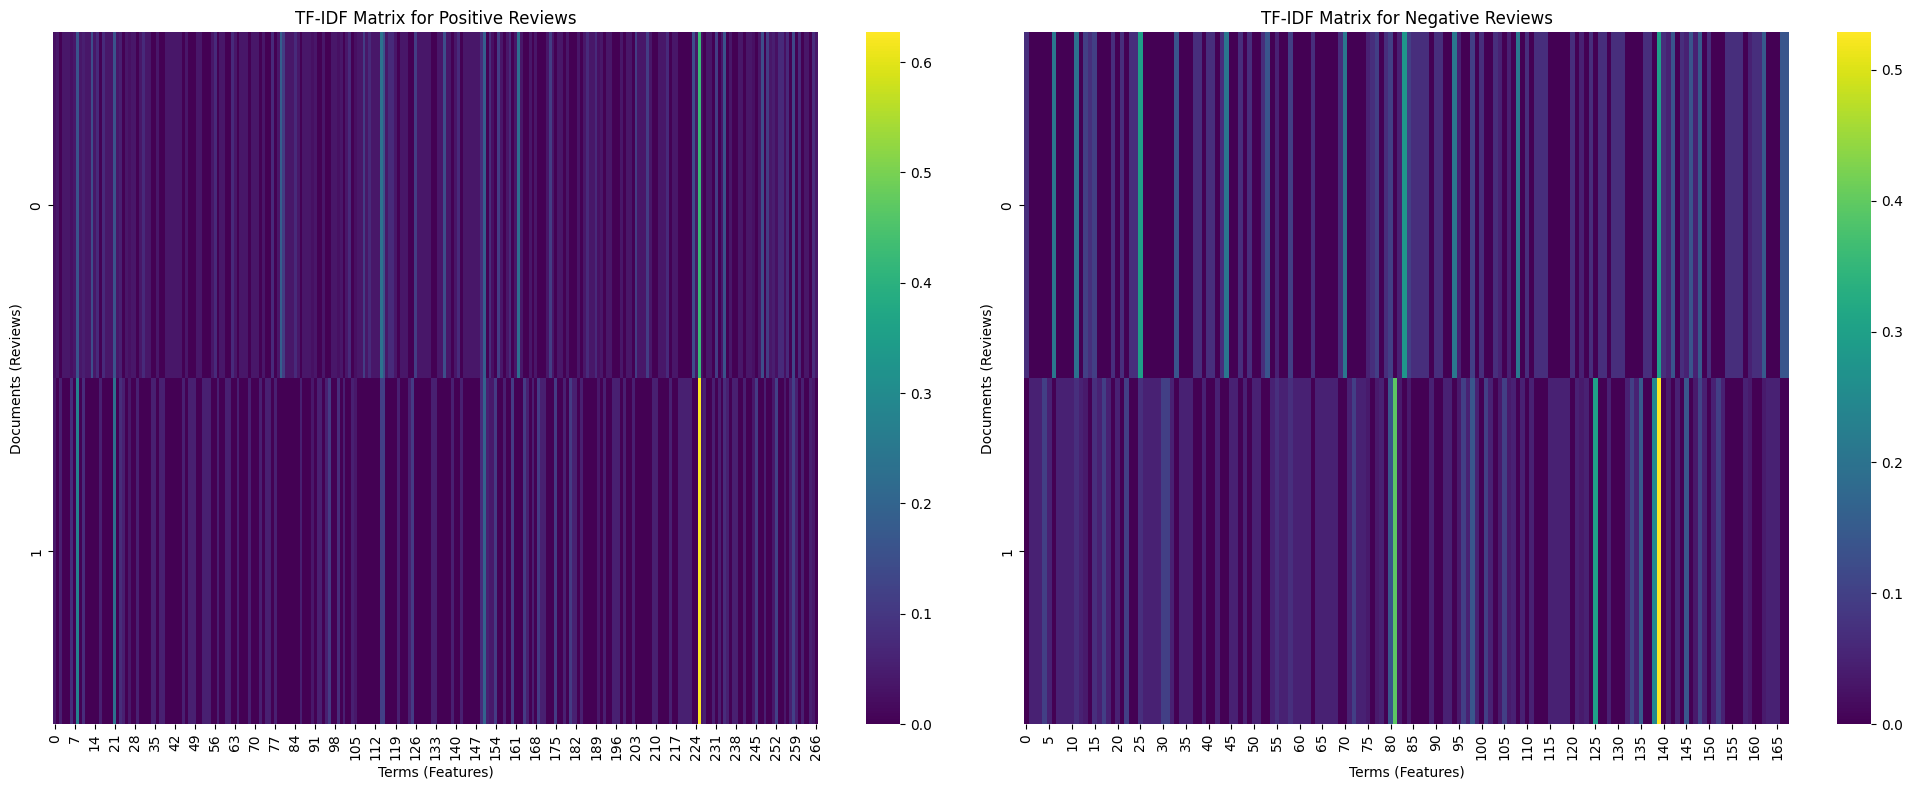

In [98]:
# # Create subplots with 1 row and 2 columns
# fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# # Plot heatmap for TF-IDF matrix of positive reviews
# sns.heatmap(tfidf_matrix_positive.toarray(), cmap='viridis', ax=axs[0])
# axs[0].set_title('TF-IDF Matrix for Positive Reviews')
# axs[0].set_xlabel('Terms (Features)')
# axs[0].set_ylabel('Documents (Reviews)')

# # Plot heatmap for TF-IDF matrix of negative reviews
# sns.heatmap(tfidf_matrix_negative.toarray(), cmap='viridis', ax=axs[1])
# axs[1].set_title('TF-IDF Matrix for Negative Reviews')
# axs[1].set_xlabel('Terms (Features)')
# axs[1].set_ylabel('Documents (Reviews)')

# plt.tight_layout()
# plt.show()

#####N-Gram

In [ ]:
# N-gram Analysis
N = 2
ngram_freq_positive = ngram_analysis(filtered_positive_tokens, n=N)
ngram_freq_negative = ngram_analysis(filtered_negative_tokens, n=N)

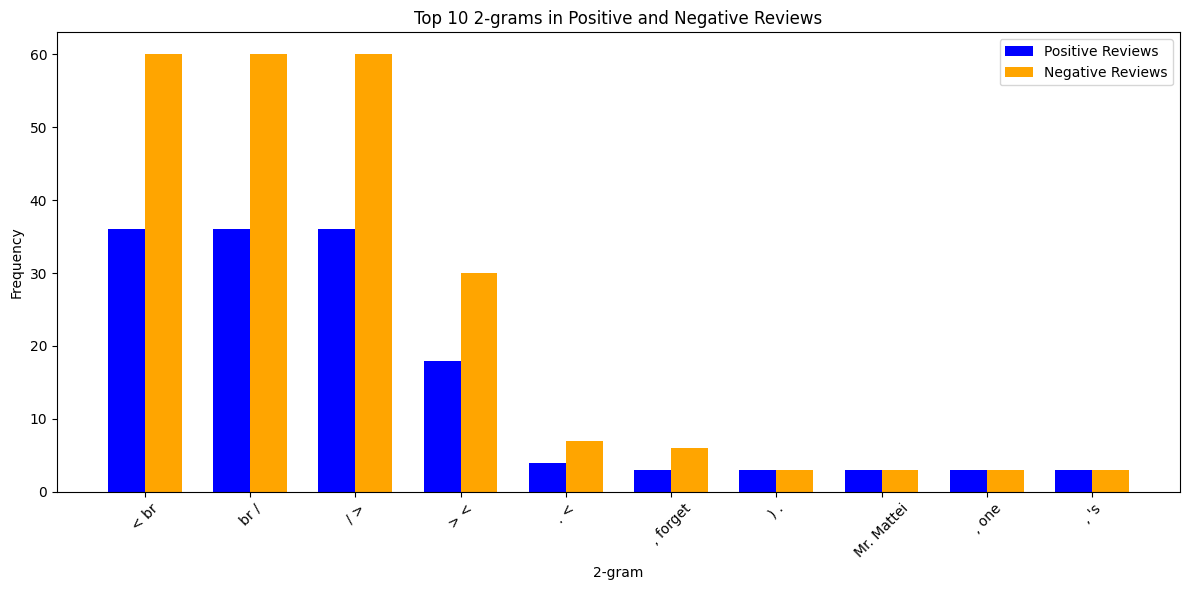

In [85]:
# Extract the N-gram labels and frequencies for positive and negative reviews
ngram_labels_positive, ngram_freqs_positive = zip(*ngram_freq_positive.most_common(10))
ngram_labels_negative, ngram_freqs_negative = zip(*ngram_freq_negative.most_common(10))

# Plot N-gram Frequencies for Positive and Negative Reviews in the same plot
plt.figure(figsize=(12, 6))

# Set the width of the bars
bar_width = 0.35

# Plot N-gram Frequencies for Positive Reviews
plt.bar(range(len(ngram_labels_positive)), ngram_freqs_positive, color='blue', label='Positive Reviews', width=bar_width)

# Plot N-gram Frequencies for Negative Reviews
plt.bar([x + bar_width for x in range(len(ngram_labels_negative))], ngram_freqs_negative, color='orange', label='Negative Reviews', width=bar_width)

# Set the x-axis ticks and labels
plt.xticks([x + bar_width / 2 for x in range(len(ngram_labels_positive))], [' '.join(ngram) for ngram in ngram_labels_positive], rotation=45)

plt.title(f'Top 10 {N}-grams in Positive and Negative Reviews')
plt.xlabel(f'{N}-gram')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

#####Lexical Diversity Analysis

In [ ]:
# Lexical Diversity Analysis
lexical_diversity_positive = lexical_diversity(filtered_positive_tokens)
lexical_diversity_negative = lexical_diversity(filtered_negative_tokens)

In [88]:
print("Lexical Diversity for Positive Reviews:", lexical_diversity_positive)
print("Lexical Diversity for Negative Reviews:", lexical_diversity_negative)

Lexical Diversity for Positive Reviews: 0.5581929555895865
Lexical Diversity for Negative Reviews: 0.4759825327510917
